<a href="https://colab.research.google.com/github/OumGhaith/Compared_Steel_Defect_inspection_using_MobilenetV2/blob/main/Comparative_NASNetMobile_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install pretrainedmodels
from torchvision import models
import pretrainedmodels


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=e7fafca052c81a11c039ba6d89ade1cba06710e5de9829e2f658db06796ea310
  Stored in directory: /root/.cache/pip/wheels/4c/01/56/40a48f75dbdfe167a0cb70d3b48913369a00ec5c4e9fed5f2b
Successfully built pretrainedmodels


In [12]:
import tensorflow as tf
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# -----------------------------
# Parameters
# -----------------------------
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
NUM_CLASSES = 6  # your steel defect classes
EPOCHS = 10

# -----------------------------
# Data generators
# -----------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    validation_split=0.2  # for K-fold or simple validation split
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/steel_images/train_dataset',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/steel_images/train_dataset',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# -----------------------------
# Load NASNet-Mobile
# -----------------------------
base_model = NASNetMobile(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Optional: freeze base layers for transfer learning
for layer in base_model.layers:
    layer.trainable = False

# Compile
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# -----------------------------
# Train
# -----------------------------
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)


Found 1152 images belonging to 6 classes.
Found 288 images belonging to 6 classes.
19993432/19993432 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 455s 6s/step - accuracy: 0.1699 - loss: 1.8681 - val_accuracy: 0.4583 - val_loss: 1.5426
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.6186 - loss: 1.3790 - val_accuracy: 0.7743 - val_loss: 1.1971
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.8237 - loss: 1.0625 - val_accuracy: 0.8542 - val_loss: 0.9766
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9224 - loss: 0.8219 - val_accuracy: 0.9028 - val_loss: 0.7957
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.9439 - loss: 0.6725 - val_accuracy: 0.9271 - val_loss: 0.6712
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - accuracy: 0.9466 - loss: 0.5752 - val_accuracy: 0.9306 - val_loss: 0.5793
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.9600 - loss: 0.4691 - val_accuracy: 0.9479 - val_loss: 0.4949
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.9575 - loss: 0.4292 - val_accuracy: 0.9583

18/18 ━━━━━━━━━━━━━━━━━━━━ 36s 72ms/step


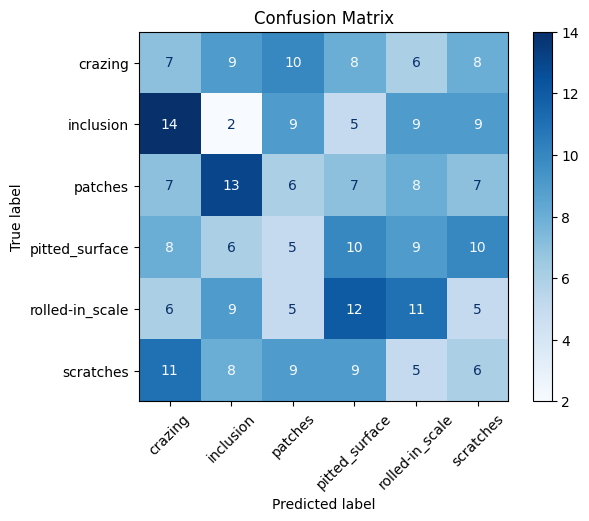

In [13]:
# Predictions & Confusion Matrix
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Predict on validation data
val_generator.reset()
y_pred = model.predict(val_generator, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

# Step 2: Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(val_generator.class_indices.keys()))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.savefig('/content/drive/MyDrive/steel_images/nasnet_confusion_matrix.png')
plt.show()


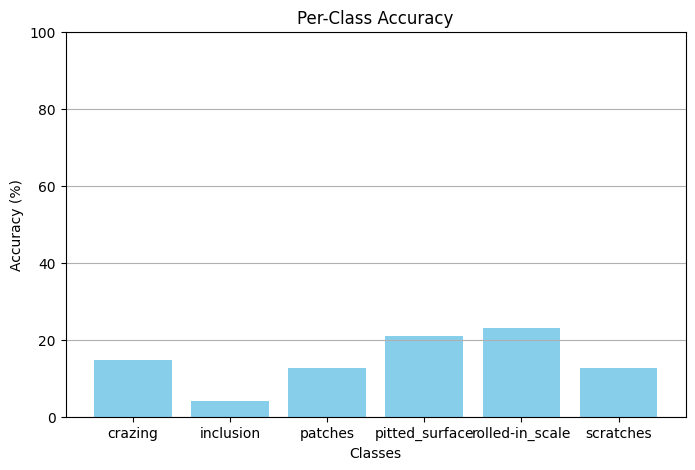

Class crazing: 14.58%
Class inclusion: 4.17%
Class patches: 12.50%
Class pitted_surface: 20.83%
Class rolled-in_scale: 22.92%
Class scratches: 12.50%


In [14]:
# Per-Class Accuracy
classes = list(val_generator.class_indices.keys())
class_correct = np.diag(cm)
class_total = cm.sum(axis=1)
class_acc = class_correct / class_total * 100

plt.figure(figsize=(8,5))
plt.bar(classes, class_acc, color='skyblue')
plt.ylabel("Accuracy (%)")
plt.xlabel("Classes")
plt.title("Per-Class Accuracy")
plt.ylim(0, 100)
plt.grid(axis='y')
plt.savefig('/content/drive/MyDrive/steel_images/nasnet_per_class_accuracy.png')
plt.show()

for cls, acc in zip(classes, class_acc):
    print(f"Class {cls}: {acc:.2f}%")


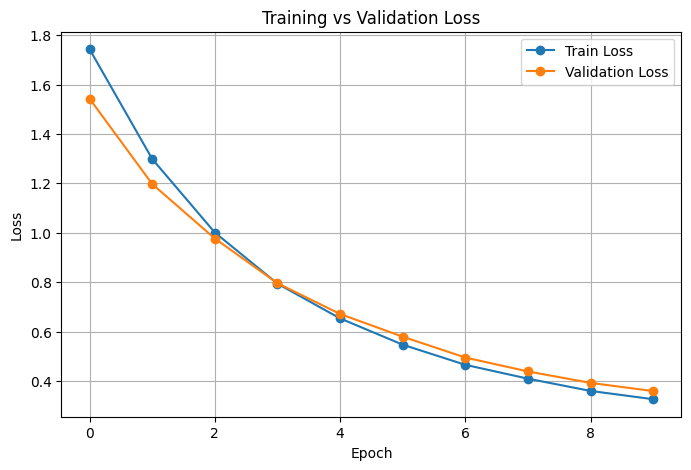

In [15]:
#Loss Curves
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label="Train Loss", marker='o')
plt.plot(history.history['val_loss'], label="Validation Loss", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.savefig('/content/drive/MyDrive/steel_images/nasnet_loss_curve.png')
plt.show()


In [17]:
# Saving Misclassified & Well-Classified Images

import pickle

misclassified, wellclassified = [], []

# Reset generator to start
val_generator.reset()

# Iterate through the generator batch by batch
for i in range(len(val_generator)):
    images, labels = val_generator[i]  # images: batch, labels: batch
    preds = np.argmax(model.predict(images, verbose=0), axis=1)
    true_labels = np.argmax(labels, axis=1)

    for img, t, p in zip(images, true_labels, preds):
        if t == p:
            wellclassified.append((img, t, p))
        else:
            misclassified.append((img, t, p))

# Save results
with open('/content/drive/MyDrive/steel_images/nasnet_misclassified.pkl', 'wb') as f:
    pickle.dump(misclassified, f)
with open('/content/drive/MyDrive/steel_images/nasnet_wellclassified.pkl', 'wb') as f:
    pickle.dump(wellclassified, f)

print(f"Saved {len(wellclassified)} well-classified and {len(misclassified)} misclassified images.")


Saved 275 well-classified and 13 misclassified images.


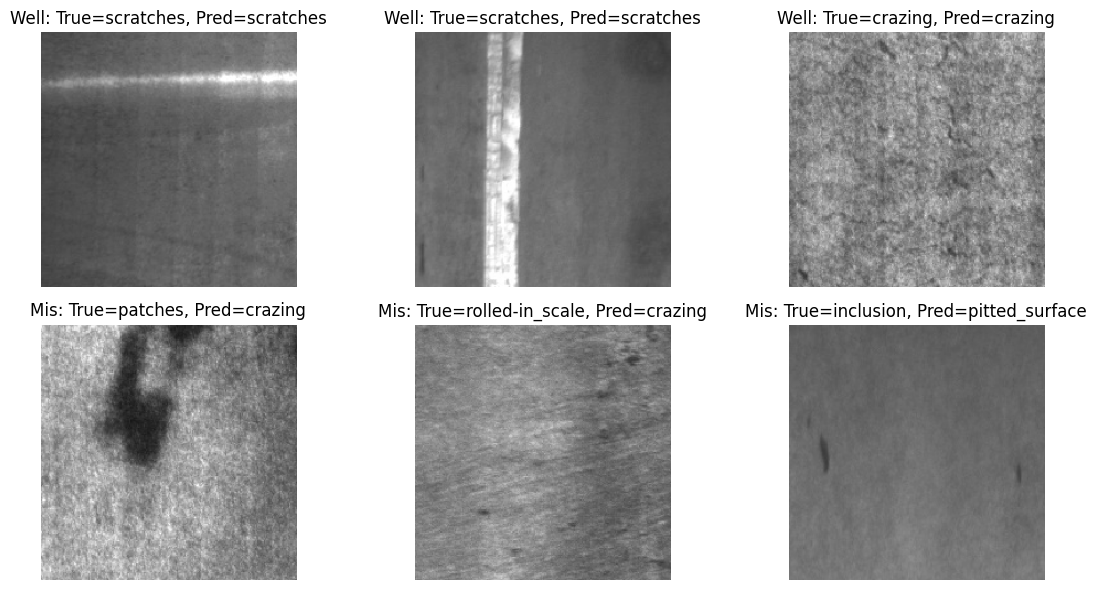

In [18]:
# Visualize a few examples
fig = plt.figure(figsize=(12,6))
for i in range(min(3, len(wellclassified))):
    img, t, p = wellclassified[i]
    ax = fig.add_subplot(2,3,i+1)
    ax.imshow(img)
    ax.set_title(f"Well: True={classes[t]}, Pred={classes[p]}")
    ax.axis('off')

for i in range(min(3, len(misclassified))):
    img, t, p = misclassified[i]
    ax = fig.add_subplot(2,3,i+4)
    ax.imshow(img)
    ax.set_title(f"Mis: True={classes[t]}, Pred={classes[p]}")
    ax.axis('off')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/steel_images/nasnet_classified_samples.png')
plt.show()


In [19]:
import time

start_train = time.time()
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)
training_time = time.time() - start_train
print(f"Total training time: {training_time:.2f} seconds ({training_time/60:.2f} minutes)")


Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - accuracy: 0.9808 - loss: 0.2980 - val_accuracy: 0.9653 - val_loss: 0.3248
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - accuracy: 0.9820 - loss: 0.2715 - val_accuracy: 0.9688 - val_loss: 0.3013
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.9781 - loss: 0.2426 - val_accuracy: 0.9722 - val_loss: 0.2735
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - accuracy: 0.9809 - loss: 0.2294 - val_accuracy: 0.9757 - val_loss: 0.2587
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - accuracy: 0.9850 - loss: 0.2056 - val_accuracy: 0.9722 - val_loss: 0.2400
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - accuracy: 0.9755 - loss: 0.1969 - val_accuracy: 0.9757 - val_loss: 0.2230
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - accuracy: 0.9826 - loss: 0.1753 - val_accuracy: 0.9757 - val_loss: 0.2156
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.9838 - loss: 0.1629 - val_accuracy:

In [20]:
import numpy as np

# Use a batch of images from validation set
val_generator.reset()
images, _ = val_generator[0]  # first batch
images = images[:10]  # measure on 10 images for speed

# Warm-up
_ = model.predict(images)

# Timing
start_infer = time.time()
_ = model.predict(images)
inference_time = (time.time() - start_infer) / len(images) * 1000  # ms per image
print(f"Average inference time: {inference_time:.2f} ms per image")


1/1 ━━━━━━━━━━━━━━━━━━━━ 28s 28s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Average inference time: 12.80 ms per image


In [22]:
# Save model temporarily to get size
model_path = '/content/drive/MyDrive/steel_images/nasnet_final.h5'
model.save(model_path)

import os
model_size_mb = os.path.getsize(model_path) / 1e6
print(f"Model size: {model_size_mb:.2f} MB")


Model size: 20.74 MB


In [24]:
total_params = model.count_params()
trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_weights])

print(f"Total parameters: {total_params}")
print(f"Trainable parameters: {trainable_params}")
print(f"Training time: {training_time:.2f} sec")
print(f"Inference time: {inference_time:.2f} ms per image")
print(f"Model size: {model_size_mb:.2f} MB")


Total parameters: 4276058
Trainable parameters: 6342
Training time: 88.88 sec
Inference time: 12.80 ms per image
Model size: 20.74 MB


In [25]:
# Save the full model (architecture + weights + optimizer)
model_path = '/content/drive/MyDrive/steel_images/nasnet_final.h5'
model.save(model_path)
print(f"Model saved at {model_path}")


Model saved at /content/drive/MyDrive/steel_images/nasnet_final.h5


In [26]:
import pickle

misclassified_path = '/content/drive/MyDrive/steel_images/nasnet_misclassified.pkl'
wellclassified_path = '/content/drive/MyDrive/steel_images/nasnet_wellclassified.pkl'

with open(misclassified_path, 'wb') as f:
    pickle.dump(misclassified, f)

with open(wellclassified_path, 'wb') as f:
    pickle.dump(wellclassified, f)

print(f"Misclassified images saved at {misclassified_path}")
print(f"Well-classified images saved at {wellclassified_path}")


Misclassified images saved at /content/drive/MyDrive/steel_images/nasnet_misclassified.pkl
Well-classified images saved at /content/drive/MyDrive/steel_images/nasnet_wellclassified.pkl


In [27]:
history_path = '/content/drive/MyDrive/steel_images/nasnet_training_history.pkl'
with open(history_path, 'wb') as f:
    pickle.dump(history.history, f)

print(f"Training history saved at {history_path}")


Training history saved at /content/drive/MyDrive/steel_images/nasnet_training_history.pkl
